In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "last_expr"

# Haberman Cancer survival dataset 

In [2]:
# dataset:   https://www.kaggle.com/gilsousa/habermans-survival-data-set

In [3]:
#importing all the prerequisites  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(sns.__version__)

0.9.0


In [5]:
#downloading and inporting the datset from : https://drive.google.com/file/d/1GzeBrb6NEnFoChpSGveToFeBwLOU8dD2/view?usp=sharing
cancer_df = pd.read_csv('haberman.csv')

Use the below for the clear explaination of each column of Habermans dataset
https://towardsdatascience.com/will-habermans-survival-data-set-make-you-diagnose-cancer-8f40b3449673

Lymph Node: Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels.
As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and
trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests 
an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

In [6]:
print(cancer_df['nodes'].min(axis= 0), end ='-')
print(cancer_df['nodes'].max(axis= 0))

0-52


#else use cancer_df.describe()

#Survival status


Survival Status: It represent whether patient survive more than 5 years or less after undergone through surgery.
Here if patients survived 5 years or more is represented as 1 and 
patients who survived less than 5 years is represented as 2.


In [7]:
print(cancer_df.shape)

# We have 306 Data points or observation in the dataset
# We have 4 columns of data

(306, 4)


In [8]:
cancer_df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [9]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [10]:
cancer_df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
cancer_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [12]:
#(Q) How many data points for each class are present? 
# here survival status is the Dependent varable where as age	year	nodes	 are independednt variables

cancer_df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [13]:
#so the above dataset is Imbalaned dataset because out of 306 it has 225 suruvived ppl data and 81 Not survived ppl data.
# almost 45-55 and 50-50 percent balnced is also good 

## 2D scatter plot

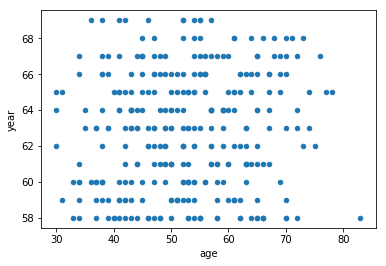

In [14]:
cancer_df.plot(kind = 'scatter' , x = 'age' , y ='year')
plt.show()

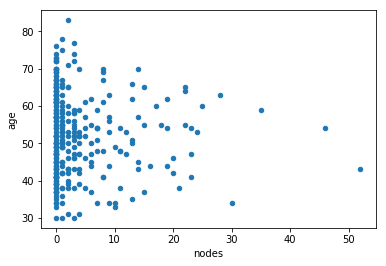

In [15]:
cancer_df.plot(kind = 'scatter' , x = 'nodes' , y ='age')
plt.show()

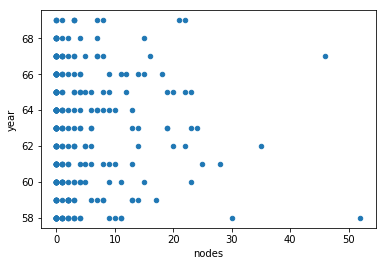

In [16]:
cancer_df.plot(kind = 'scatter' , x = 'nodes' , y ='year')
plt.show()

In [17]:
'''plt.plot(cancer_df.year,cancer_df.nodes,'ro')
plt.show() '''

"plt.plot(cancer_df.year,cancer_df.nodes,'ro')\nplt.show() "

In [18]:
cancer_df['year'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

In [19]:
cancer_df['year'].value_counts().max()

36

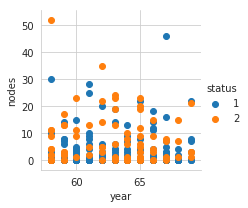

In [20]:
# 2-D Scatter plot with color-coding for each status/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")
g = sns.FacetGrid(cancer_df, hue ='status')
g = g.map(plt.scatter,"year","nodes") 
#g = g.set(xlim=(55, 70))
g = g.add_legend()
plt.show()

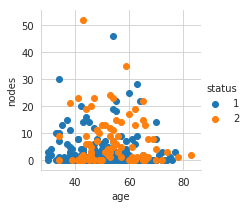

In [21]:
# 2-D Scatter plot with color-coding for each status/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid")
g = sns.FacetGrid(cancer_df, hue ='status')
g = g.map(plt.scatter,"age","nodes") 
#g = g.set(xlim=(55, 70))
g = g.add_legend()
plt.show()

# 3D Scatter plot

## (3.3) Pair-plot

###  https://seaborn.pydata.org/generated/seaborn.pairplot.html

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


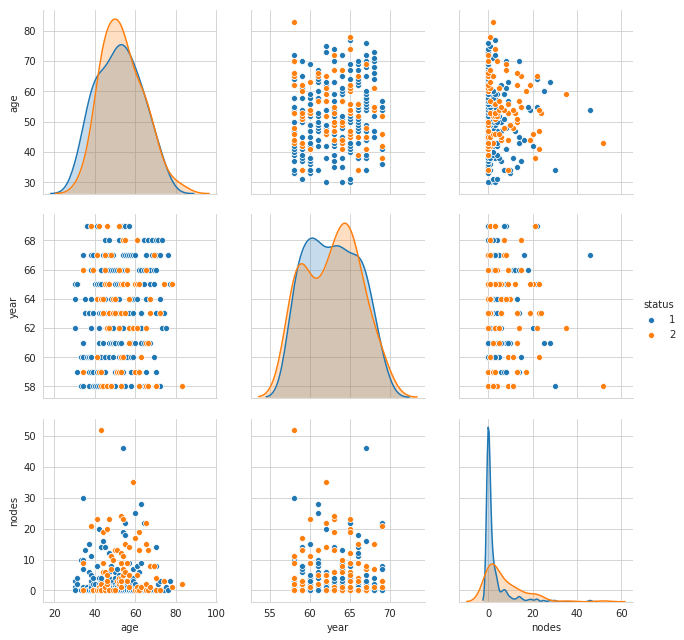

In [22]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer_df,hue ='status', height =3, vars=['age','year','nodes']);
#sns.pairplot(cancer_df,hue ='status', height =3, vars=['age','year','nodes'], diag_kind  = 'auto',
             #kind='scatter' ,palette={1:'g', 2 :'r'});
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

Observations:
Pair plots are like
1 2 3
4 5 6
7 8 9
here 2,3,6 plots are same as 4,7,8.. Considering 4,7,8 for the Data visualization purpose
Considering nodes and age plot i.e., plot 7 

# (3.4) Histogram, PDF, CDF

### 1D scatter plot of nodes for status 1 and 2

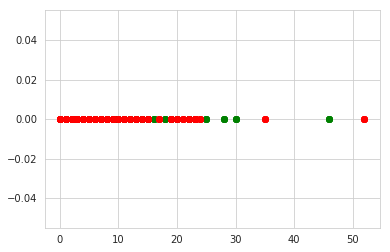

In [23]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
survived_more_than_5years = cancer_df[cancer_df["status"]==1]
survived_less_than_5years = cancer_df[cancer_df["status"]==2]

plt.plot(survived_more_than_5years["nodes"], np.zeros_like(survived_more_than_5years), 'go')
plt.plot(survived_less_than_5years["nodes"], np.zeros_like(survived_less_than_5years), 'ro')
plt.show()

In [24]:
#cancer_df.head(5)
survived_more_than_5years.head(5)
#survived_less_than_5years.head(5)
#cancer_df[(cancer_df["age"]>76) & (cancer_df.year == 65)]

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [25]:
import numpy as np

# Univariate analysis

/home/u31065/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


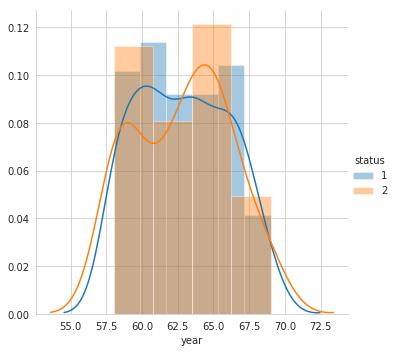

In [26]:
sns.FacetGrid(cancer_df, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();

plt.show();

/home/u31065/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


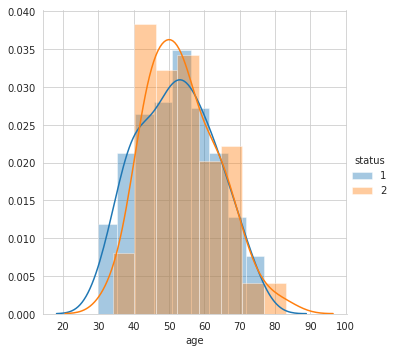

In [27]:
sns.FacetGrid(cancer_df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

/home/u31065/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


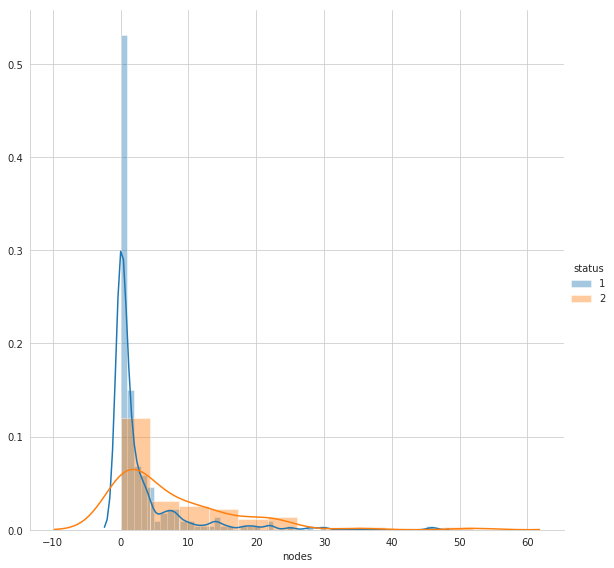

In [28]:
sns.FacetGrid(cancer_df, hue="status", size=8) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

In [29]:
#cancer_df.nodes.describe()


In [30]:
'''
if: 
    a person has 0 nodes or less than 0 that indicates no cancer cells at their nodes survival chances are high
else if:  
    person has nodes count belongs to [0,4] in that overlap region if you see the status 1 curve is above the status 2 curve i.e., 
    survival chances high curve holds the majority
else:
    when nodes > 4 if you see the status 2 curve is above the status 1 curve
    here the majority of the survival chances are less than 5 years
    
'''

'\nif: \n    a person has 0 nodes or less than 0 that indicates no cancer cells at their nodes survival chances are high\nelse if:  \n    person has nodes count belongs to [0,4] in that overlap region if you see the status 1 curve is above the status 2 curve i.e., \n    survival chances high curve holds the majority\nelse:\n    when nodes > 4 if you see the status 2 curve is above the status 1 curve\n    here the majority of the survival chances are less than 5 years\n    \n'

In [31]:
'''
if nodes <=0:
    status = 1 (100%)
elif nodes >0 and nodes <=4(apprrox):
    status = 1 (status 1 curve > 2 curve from [0,4])
else:
    status = 2
    
'''

'\nif nodes <=0:\n    status = 1 (100%)\nelif nodes >0 and nodes <=4(apprrox):\n    status = 1 (status 1 curve > 2 curve from [0,4])\nelse:\n    status = 2\n    \n'

In [32]:
survived_more_than_5years.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### PDF  (Probability Desity function)

[188  18   5   6   4   1   2   0   0   1] 
 [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

 PDF 
 [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444] 


 CDF 
 [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ] 



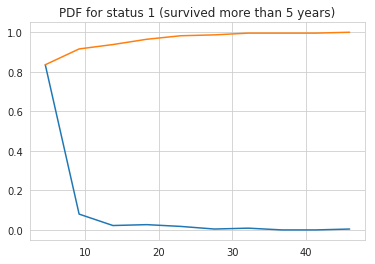

In [33]:
#PDF  and CDF for status 1 
#PDF
counts,bin_edges = np.histogram(survived_more_than_5years['nodes'])

print(counts,'\n', bin_edges)
#print(len(counts),len(bin_edges))

pdf = counts/sum(counts)
print('\n','PDF','\n',pdf,'\n')

plt.plot(bin_edges[1:],pdf)
plt.title('PDF for status 1 (survived more than 5 years)')
#plt.show()

#CDF for status 1 
cdf = np.cumsum(pdf)
print('\n','CDF','\n',cdf,'\n')

plt.plot(bin_edges[1:],cdf)
plt.show()

[46 12 11  4  6  0  1  0  0  1]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

 PDF 
 [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568] 


 CDF 
 [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ] 



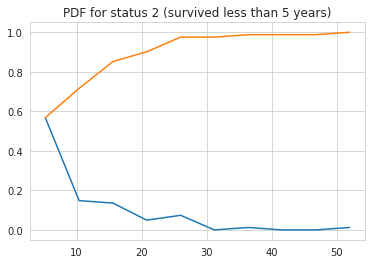

In [34]:
#PDF and CDF for status 2
#PDF
counts,bin_edges = np.histogram(survived_less_than_5years['nodes'])

print(counts)
print(bin_edges)
#print(len(counts),len(bin_edges))

pdf = counts/sum(counts)
print('\n','PDF','\n',pdf,'\n')

plt.plot(bin_edges[1:],pdf)
plt.title('PDF for status 2 (survived less than 5 years)')
#plt.show()

#CDF for status 1 
cdf = np.cumsum(pdf)
print('\n','CDF','\n',cdf,'\n')

plt.plot(bin_edges[1:],cdf)
plt.show()

[188  18   5   6   4   1   2   0   0   1] 
 [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]

 PDF1 
 [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444] 


 CDF1 
 [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ] 

[46 12 11  4  6  0  1  0  0  1]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

 PDF2 
 [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568] 


 CDF2 
 [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ] 



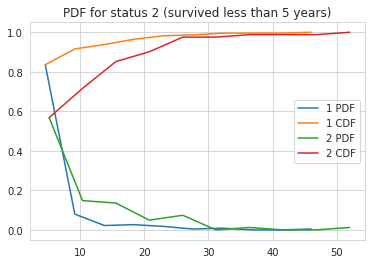

In [43]:
#Combined PDF and CDF plots for status 1 and 2 

#PDF  and CDF for status 1 
#PDF
counts,bin_edges = np.histogram(survived_more_than_5years['nodes'])

print(counts,'\n', bin_edges)
#print(len(counts),len(bin_edges))

pdf1 = counts/sum(counts)
print('\n','PDF1','\n',pdf1,'\n')

plt.plot(bin_edges[1:],pdf1, label ='1 PDF' )
plt.title('PDF for status 1 (survived more than 5 years)')
#plt.show()

#CDF for status 1 
cdf1 = np.cumsum(pdf1)
print('\n','CDF1','\n',cdf1,'\n')

plt.plot(bin_edges[1:],cdf1, label = '1 CDF')
#plt.show()


#PDF and CDF for status 2
#PDF
counts,bin_edges = np.histogram(survived_less_than_5years['nodes'])

print(counts)
print(bin_edges)
#print(len(counts),len(bin_edges))

pdf2 = counts/sum(counts)
print('\n','PDF2','\n',pdf2,'\n')

plt.plot(bin_edges[1:],pdf2, label ='2 PDF' )
plt.title('PDF for status 2 (survived less than 5 years)')
#plt.show()

#CDF for status 1 
cdf2 = np.cumsum(pdf2)
print('\n','CDF2','\n',cdf2,'\n')

plt.plot(bin_edges[1:],cdf2, label = '2 CDF')
plt.legend()
plt.show()

In [89]:
# Observations:
# 1. 80% of Nodes are less than 4(approx) for ppl who survived more than 5 years
# 2. 60% of Nodes are less than 4(approx) for ppl who survived more than 5 years

In [77]:
#Means
print('\nMeans:')
print('Mean of Status 1 nodes: {}'.format(np.mean(survived_more_than_5years.nodes)))
print('Mean of Status 2 nodes: {}'.format(np.mean(survived_less_than_5years.nodes)))


Means:
Mean of Status 1 nodes: 2.7911111111111113
Mean of Status 2 nodes: 7.45679012345679


In [ ]:
#Observations
# Avg value of nodes for short survival > Avg value of nodes short survival

In [48]:
#Std-Dev
print('\nStd-Deviation:')
print('Std-Dev of Status 1 nodes: {}'.format(np.std(survived_more_than_5years.nodes)))
print('Std-Dev of Status 2 nodes: {}'.format(np.std(survived_less_than_5years.nodes)))


Std-Deviation:
Std-Dev of Status 1 nodes: 5.857258449412138
Std-Dev of Status 2 nodes: 9.128776076761635


#### Median is the Central value

In [58]:
#Median : 
print('\nMean:')
print('Before appending 50 an Outlier')
print('Mean of Status 1 nodes: {}'.format( np.mean(survived_more_than_5years.nodes) ))
print('Mean after appending 50 an Outlier')
print('Mean of Status 1 nodes: {}'.format( np.mean(np.append(survived_more_than_5years.nodes,50)) ))


print('\nMedian:')
print('Before appending 50 an Outlier')
print('Median of Status 1 nodes: {}'.format( np.median(survived_more_than_5years.nodes)) )
print('Median after appending 50 an Outlier')
print('Median of Status 1 nodes: {}'.format( np.median(np.append(survived_more_than_5years.nodes,50)) ))

print('\nMedian of Status 2 nodes: {}'.format( np.median(survived_less_than_5years.nodes)) )


Mean:
Before appending 50 an Outlier
Mean of Status 1 nodes: 2.7911111111111113
Mean after appending 50 an Outlier
Mean of Status 1 nodes: 3.0

Median:
Before appending 50 an Outlier
Median of Status 1 nodes: 0.0
Median after appending 50 an Outlier
Median of Status 1 nodes: 0.0

Median of Status 2 nodes: 4.0


In [ ]:
#Observations:
#Mean values effects with the presence of an outlier 
#Median values doesn't effects with the presence of an outlier 

In [87]:
print('\nPercentiles: [0th 25 50 75 100]')
print('Status 1 percentiles: ',np.percentile(survived_more_than_5years.nodes,np.arange(0,101,25)))
print('Status 2 percentiles: ',np.percentile(survived_less_than_5years.nodes,np.arange(0,101,25)))

print('\n90th Percentiles')
print('Status 1 90th percentile: ',np.percentile(survived_more_than_5years.nodes,90))
print('Status 2 90th percentile: ',np.percentile(survived_less_than_5years.nodes,90))


Percentiles: [0th 25 50 75 100]
Status 1 percentiles:  [ 0.  0.  0.  3. 46.]
Status 2 percentiles:  [ 0.  1.  4. 11. 52.]

90th Percentiles
Status 1 90th percentile:  8.0
Status 2 90th percentile:  20.0


In [91]:
#Observations:
#82% of the people had survived has nodes between 0 and 4 (approx)

#1 For long survival first 50% of values are 0's
#2 For long survival first 75% of values are <=3
#3 For long survival 90%th values are <= 8

#2 For short survival first 75% of values are <=4
#3 For short survival 90%th values are <=20

In [96]:
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print('Status 1 MAD: ',robust.mad(survived_more_than_5years['nodes']))
print('Status 2 MAD:',robust.mad(survived_less_than_5years['nodes']))


Median Absolute Deviation
Status 1 MAD:  0.0
Status 2 MAD: 5.930408874022408


### (3.7) Box plot and Whiskers

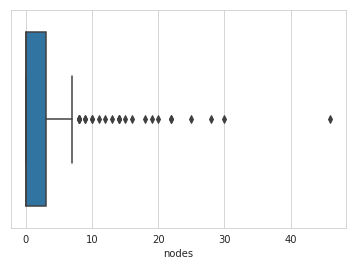

In [102]:
sns.boxplot(survived_more_than_5years.nodes)
plt.show()

#IQR --> 75%-25% = 50% of values lies nodes are btw 0 and 3.6 approx for who survived more than 5 years

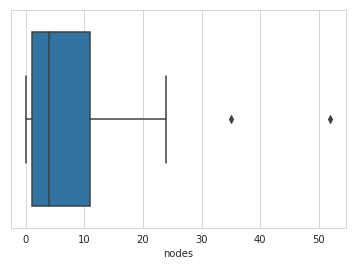

In [114]:
sns.boxplot(survived_less_than_5years.nodes)
plt.show()

#IQR --> 75%-25% = 50% of values lies nodes are btw 1 and 11 approx for who survived less than 5 years

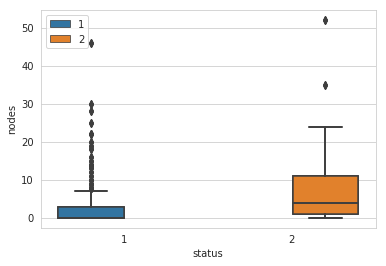

In [126]:
sns.boxplot(x='status', y = 'nodes' , data = cancer_df, hue="status")\
    .legend(loc='upper left')
#sns.boxplot(x='status', y = 'nodes' , data = cancer_df, order = [2,1])
plt.show()

# (3.8) Violin plots

### Voilin plot is the combination of Box plot and PDF

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


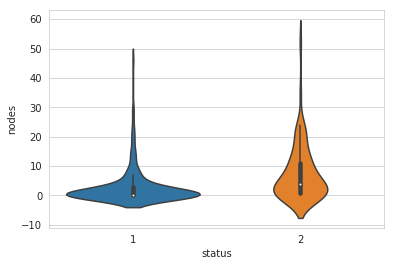

In [129]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="status", y="nodes", data=cancer_df, size=10)
plt.show()

## Multivariate probability density, contour plot.

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


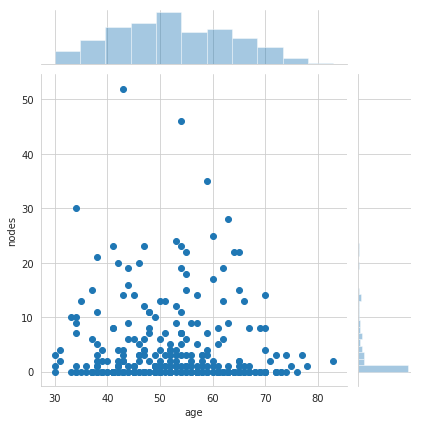

In [132]:
#2D density plot and Countour plot

sns.jointplot(x='age' , y = 'nodes' , data  = cancer_df)
plt.show()

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


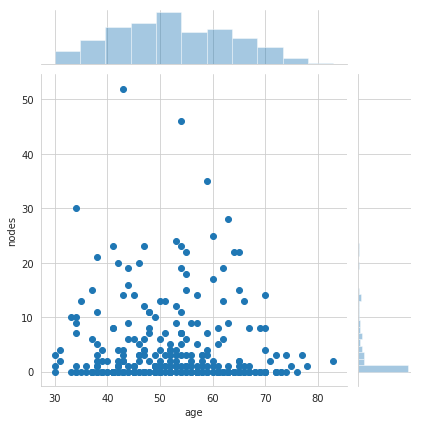

In [137]:
#2D density plot and Countour plot

sns.jointplot(x='age' , y = 'nodes' , data  = cancer_df )
plt.show()

/glob/intel-python/versions/2018u2/intelpython3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


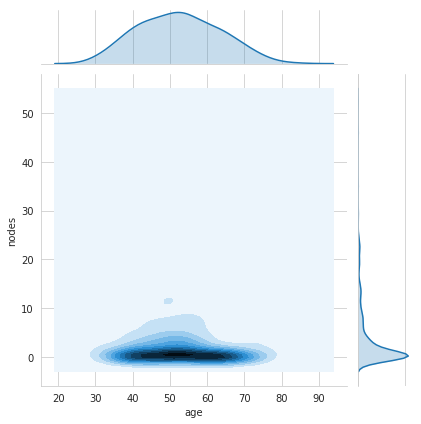

In [135]:
sns.jointplot(x='age' , y = 'nodes' , data  = cancer_df, kind ='kde' )
plt.grid()
plt.show()

In [136]:
#observations:
# Most of the points lie in the age btw 45-65 approx
# Most of the points lie in the nodes btw 0-3 approx